In [29]:
import kaggle
import zipfile
import os


api = kaggle.api

datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']
kaggle.api.dataset_download_files(ref,path='data')

datasets = api.datasets_list(search='Air Traffic Passenger Statistics')
ref = datasets[0]['ref']
kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")

airlines-traffic-passenger-statistics.zip  case_2.ipynb  data
airplane-crashes-and-fatalities.zip	   case_2.py	 requirements.txt


,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [30]:
import seaborn as sns 
import matplotlib as plt
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots
from datetime import date

In [31]:
# total fatilities of each year 
acf_df['Date'] = pd.to_datetime(acf_df['Date'])

# jaarlijkse slachtoffers 
yearly_fatalities = acf_df.groupby(acf_df.Date.dt.year).agg({'Fatalities': 'sum', 'Aboard': 'sum'}).reset_index()


In [32]:
aircraft_counts = acf_df.groupby([acf_df.Date.dt.year, 'Type']).size().reset_index(name = "aantal") # Aantal vliegtuigen per type
max_ac_per_year = aircraft_counts.groupby('Date')['aantal'].idxmax() # Meest voorkomend vliegtuig per jaar op basis van index
most_common_aircraft = aircraft_counts.loc[max_ac_per_year] # Laat het type vliegtuig zien dat het vaakst voorkomt per jaar. 

yearly_fatalities_aircraft = yearly_fatalities.merge(most_common_aircraft[["Date", "Type"]], on = "Date")


In [33]:
# creeëren van slider
rangeselector=dict(
    buttons=list([
        dict(count=10, label = "10j", step = "year", stepmode = "backward"),
        dict(count=20, label = "20j", step = "year", stepmode = "backward"),
        dict(count=30, label = "30j", step = "year", stepmode = "backward"),
        dict(count=40, label = "40j", step = "year", stepmode = "backward"),
        dict(count=50, label = "50j", step = "year", stepmode = "backward"),
        dict(count=60, label = "60j", step = "year", stepmode = "backward"),
        dict(count=70, label = "70j", step = "year", stepmode = "backward"),
        dict(count=80, label = "80j", step = "year", stepmode = "backward"),
        dict(count=90, label = "90j", step = "year", stepmode = "backward"),
        dict(count=100, label = "100j", step = "year", stepmode = "backward"),
        dict(step = "all")]))



In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = yearly_fatalities_aircraft["Date"], y = yearly_fatalities_aircraft["Fatalities"], name = "Slachtoffers"))
fig.add_trace(go.Scatter(x = yearly_fatalities_aircraft["Date"], y = yearly_fatalities_aircraft["Aboard"], name = "Aanboord"))

fig.update_layout(title = "Totaal aantal passagiers en slachtoffers", xaxis_title = "Jaren", yaxis_title = "Aantal passagiers en slachtoffers",
                 xaxis_rangeslider_visible=True, xaxis=dict(rangeselector=rangeselector)
                                   )
                  
                 

fig.show()

In [35]:
yearly_fatalities_aircraft.head()

,Date,Fatalities,Aboard,Type
0,1908,1.0,2.0,Wright Flyer III
1,1912,5.0,5.0,Dirigible
2,1913,45.0,51.0,Curtiss seaplane
3,1915,40.0,60.0,Zeppelin L-10 (airship)
4,1916,108.0,109.0,Schutte-Lanz S-L-10 (airship)


In [36]:
yearly_fatalities.sort_values("Fatalities", ascending = False).iloc[0:10]

,Date,Fatalities,Aboard
60,1972,2937.0,3635.0
73,1985,2670.0,3480.0
61,1973,2485.0,3433.0
84,1996,2386.0,3058.0
62,1974,2318.0,3064.0
77,1989,2293.0,3643.0
56,1968,2156.0,2928.0
65,1977,2138.0,2662.0
80,1992,2122.0,2965.0
64,1976,2059.0,2629.0


In [37]:
yearly_fatalities_aircraft["Type"].value_counts().iloc[0:10]

Douglas DC-3                                32
de Havilland Canada DHC-6 Twin Otter 300     8
De Havilland DH-4                            6
Breguet 14                                   6
Antonov AN-26                                5
Cessna 208B Grand Caravan                    3
Boeing 40                                    2
Douglas C-47                                 2
Junkers JU-52/3m                             2
Cessna 208B Caravan I Super Cargomaster      2
Name: Type, dtype: int64

In [38]:
yearly_fatalities.describe()

,Date,Fatalities,Aboard
count,98.000000,98.000000,98.000000
mean,1960.438776,1076.316327,1475.010204
std,28.541547,779.428665,1094.199773
min,1908.000000,1.000000,2.000000
25%,1936.250000,194.750000,227.250000
50%,1960.500000,1214.000000,1504.500000
75%,1984.750000,1629.750000,2392.750000
max,2009.000000,2937.000000,3643.000000


In [39]:
top_10_ac = acf_df["Type"].value_counts().iloc[0:10]
top_10_ac_df = pd.DataFrame(top_10_ac)
top_10_ac_df.head(10)

,Type
Douglas DC-3,334
de Havilland Canada DHC-6 Twin Otter 300,81
Douglas C-47A,74
Douglas C-47,62
Douglas DC-4,40
Yakovlev YAK-40,37
Antonov AN-26,36
Junkers JU-52/3m,32
Douglas C-47B,29
De Havilland DH-4,28


In [ ]:
#barplot van top 10 aircraft

bar_top_10 = px.bar(top_10_ac, y = "Type")

bar_top_10.update_layout(title = "Aantal toestellen betrokken bij dodelijke ongelukken", xaxis_title = "Toestel", yaxis_title = "Aantal")
bar_top_10.show()

In [40]:
# inladen andere dataset
!kaggle datasets download thedevastator/airlines-traffic-passenger-statistics

airlines-traffic-passenger-statistics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
zf1 = zipfile.ZipFile("./airlines-traffic-passenger-statistics.zip")
atps_df = pd.read_csv(zf1.open("Air_Traffic_Passenger_Statistics.csv"))
atps_df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [42]:
atps_df["Date"] = atps_df["Year"].copy()
print(atps_df["Date"])

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
15002    2016
15003    2016
15004    2016
15005    2016
15006    2016
Name: Date, Length: 15007, dtype: int64


In [43]:
yearly_passenger_count = atps_df.groupby('Date')['Passenger Count'].sum().reset_index()
print(yearly_passenger_count)

    Date  Passenger Count
0   2005         17222033
1   2006         33332970
2   2007         35554082
3   2008         37234678
4   2009         37338942
5   2010         39253999
6   2011         40927786
7   2012         44399885
8   2013         44945760
9   2014         47114631
10  2015         50057887
11  2016         11429847


In [44]:
fatalities_05_09 = yearly_fatalities[yearly_fatalities["Date"] >= 2005]
print(fatalities_05_09)

    Date  Fatalities  Aboard
93  2005      1306.0  2164.0
94  2006      1136.0  1413.0
95  2007       931.0  1364.0
96  2008       820.0  1463.0
97  2009       581.0   891.0


In [45]:
passengercount_05_09 = yearly_passenger_count[ (yearly_passenger_count["Date"] >= 2005) & (yearly_passenger_count["Date"] <= 2009)]
print(passengercount_05_09)

   Date  Passenger Count
0  2005         17222033
1  2006         33332970
2  2007         35554082
3  2008         37234678
4  2009         37338942


In [46]:
passenger_fatalities = passengercount_05_09.merge(fatalities_05_09, on = "Date")
print(passenger_fatalities)

   Date  Passenger Count  Fatalities  Aboard
0  2005         17222033      1306.0  2164.0
1  2006         33332970      1136.0  1413.0
2  2007         35554082       931.0  1364.0
3  2008         37234678       820.0  1463.0
4  2009         37338942       581.0   891.0


In [47]:
fig2 = make_subplots(rows = 2, cols = 1, subplot_titles=("Aantal passagiers", "Aantal slachtoffers"))


fig2.append_trace(go.Bar(x = passenger_fatalities["Date"], y = passenger_fatalities["Passenger Count"], name = "Aantal passagiers"), row = 1, col = 1)
fig2.append_trace(go.Bar(x = passenger_fatalities["Date"], y = passenger_fatalities["Fatalities"], name = "Aantal slachtoffers", offsetgroup=1), row = 2, col = 1)



fig2.update_layout(title_text="Aantal passagiers en slachtoffers 2005-2009")
fig2.update_xaxes(title_text="Jaren")
   

fig2.show()

In [48]:
!pip install streamlit kaggle nbdime

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [50]:
import kaggle
import zipfile
import os


api = kaggle.api

datasets = api.datasets_list(search='Airplane Crashes and Fatalities')
ref = datasets[0]['ref']
kaggle.api.dataset_download_files(ref,path='data')

datasets = api.datasets_list(search='Air Traffic Passenger Statistics')
ref = datasets[0]['ref']
kaggle.api.dataset_download_files(ref,path='data')

files = os.listdir("data")
for file in files:
    if ".zip" in file:
        with zipfile.ZipFile(f"data/{file}","r") as zip_ref:
            zip_ref.extractall("data")

            


In [51]:
Air_Traffic = pd.read_csv("data/Air_Traffic_Passenger_Statistics.csv")


/tmp/ipykernel_13389/1757590505.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



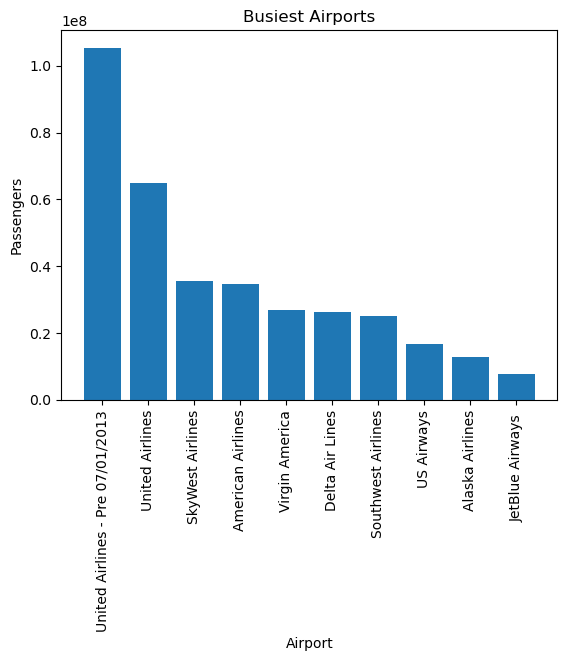

In [52]:
busiest_airports = Air_Traffic.groupby('Operating Airline').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

/tmp/ipykernel_13389/1640547129.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



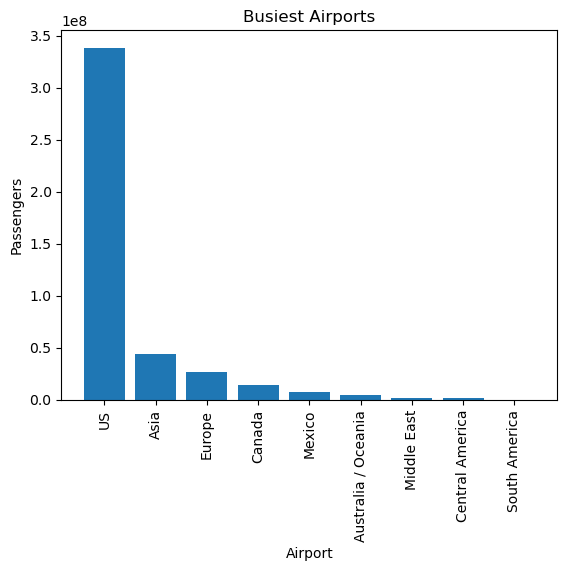

In [53]:
busiest_airports = Air_Traffic.groupby('GEO Region').sum()['Passenger Count'].sort_values(ascending=False)[:10]

plt.bar(busiest_airports.index, busiest_airports.values)
plt.xticks(rotation=90)
plt.xlabel('Airport')
plt.ylabel('Passengers')
plt.title('Busiest Airports')
plt.show()

# Histogram

In [54]:
Air_Traffic.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [55]:
def period_to_date(var):
    period = str(var)
    year = period[0:4]
    month = period[4:]
    return f"{year}-{month}"

Air_Traffic['Date'] = pd.to_datetime(Air_Traffic['Activity Period'].apply(period_to_date))


In [57]:
flights_per_year = Air_Traffic.groupby(['Date','GEO Region']).count()['index']
region_flights = {
    'date':[],
    'region':[],
    'flights':[],
}
for key in flights_per_year.keys():
    region_flights['date'].append(key[0])
    region_flights['region'].append(key[1])
    region_flights['flights'].append(flights_per_year[key])

region_flights_df = pd.DataFrame(region_flights)
print(region_flights_df.head())
fig = px.line(region_flights_df,x='date',y='flights',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})

        date               region  flights
0 2005-07-01                 Asia       25
1 2005-07-01  Australia / Oceania        5
2 2005-07-01               Canada       11
3 2005-07-01      Central America        2
4 2005-07-01               Europe       17


In [80]:
passenger_per_year = Air_Traffic.groupby(['Date','GEO Region']).sum()['Passenger Count']

passenger_flights = {
    'date':[],
    'region':[],
    'passengers':[],
}
for key in passenger_per_year.keys():
    passenger_flights['date'].append(key[0])
    passenger_flights['region'].append(key[1])
    passenger_flights['passengers'].append(passenger_per_year[key])


passenger_flights_df = pd.DataFrame(passenger_flights)


passenger_flights_df.sort_values(['date','region'])

fig = px.line(passenger_flights_df,x='date',y='passengers',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})
fig.show()




/tmp/ipykernel_13389/3405122500.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [86]:
passenger_deltas_df = passenger_flights_df.sort_values(['region','date'])

passenger_deltas_df['passenger_deltas'] = passenger_deltas_df['passengers'].diff()
for region in passenger_deltas_df['region'].unique():
    start_index = passenger_deltas_df[passenger_flights_df.region == region].first_valid_index()
    passenger_deltas_df.at[start_index,'passenger_deltas'] = 0

print(passenger_deltas_df.head())

fig = px.line(passenger_deltas_df,x='date',y='passenger_deltas',color='region',markers=True,symbol='region')
fig.update_traces(marker={'size': 10})
fig.show()

         date region  passengers  passenger_deltas
0  2005-07-01   Asia      359514               0.0
7  2005-08-01   Asia      356959           -2555.0
14 2005-09-01   Asia      297234          -59725.0
21 2005-10-01   Asia      316462           19228.0
28 2005-11-01   Asia      303763          -12699.0


/tmp/ipykernel_13389/2621356615.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_12690/1162919785.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

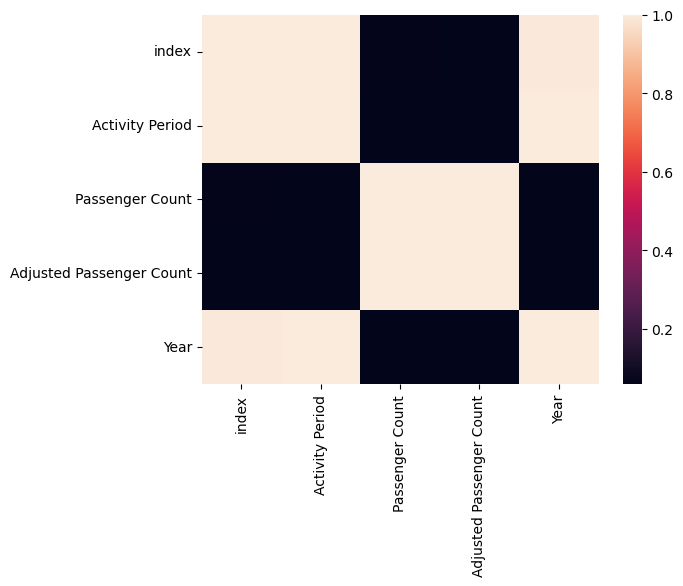

In [ ]:
sns.heatmap(Air_Traffic.corr())

In [ ]:
#!streamlit run case_2.py

SyntaxError: invalid syntax (3329006464.py, line 1)

In [ ]:
acf_df = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
acf_df = pd.read_csv("data/Airplane_Crashes_and_Fatalities_Since_1908.csv")
acf_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## Hoogste aantal doden per type en operator van de vliegtuigen

## Data Cleaning TYPE

In [ ]:
type_fatalities = acf_df.groupby(acf_df['Type'])['Fatalities'].sum().reset_index()
print(type_fatalities)

                                       Type  Fatalities
0                              AAC-1 Toucan        23.0
1                                      AEGK         5.0
2                            AT L98 Carvair         4.0
3                                ATR 42-300         2.0
4                                ATR-42-300        46.0
...                                     ...         ...
2441                    de Havilland Dove 1        22.0
2442                  de Havilland Dragon 1         3.0
2443  de Havilland RU-6A Beaver /Bell UH-1H        18.0
2444     de havilland Canada Twin Otter 200        11.0
2445                      deHavilland DH-86         9.0

[2446 rows x 2 columns]


## Data verkenning TYPE + visualisatie

In [ ]:
#Interactieve weergave van het type en fatalities
import plotly.express as px

fig = px.bar(type_fatalities.query('Fatalities > 1000'),
             y="Fatalities",
             x="Type",
             animation_frame="Type", animation_group="Type",
             color="Fatalities", 
             log_y=True,
             title="Type vliegtuig en Fatalities (Fatalities > 1000)", range_y=[1,10000], range_x=[-0.5,3.3])

fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

Conclusie: We zien dus dat het type Douglas DC-3 de meeste doden had, in totaal waren dat 4793 personen. Als we kijken naar de top 4, met meeste fatalities boven 1000 personen, is er te zien dat alle vliegtuigen commerciele vliegtuigen zijn. Daarnaast is de Antonov AN-26 ook als militair toestel gebruikt. Wat opmerkt uit de visualisatie is dat er drie verschillende type vliegtuigen, met de meeste fatalities, van dezelfde vliegtuigbouwer zijn; Douglas. 

Dit zijn absolute waarden dus we hebben alleen naar fatalities gekeken en niet naar b.v. hoeveel vluchten de types hebben uitgevoerd.

## Data Cleaning OPERATOR

In [ ]:
operator_fatalities = acf_df.groupby(acf_df['Operator'])['Fatalities'].sum().reset_index()
print(operator_fatalities)

                           Operator  Fatalities
0                 A B Aerotransport         3.0
1                  AB Aerotransport        58.0
2                     ACES Colombia        40.0
3                      ADC Airlines        97.0
4                     ADES Colombia        22.0
...                             ...         ...
2471           Zantop Air Transport        13.0
2472                 Zantop Airways         2.0
2473  Zantop International Airlines         4.0
2474                     Zen Nippon         2.0
2475          de Havilland Aircraft        11.0

[2476 rows x 2 columns]


## Data verkenning OPERATOR + visualisatie

In [ ]:
# Nu kijken we naar de meeste doden per operator
# Top 7 operators met de meeste doden
import plotly.graph_objs as go

operator_data = operator_fatalities.query('Fatalities > 1000')

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'gray', 'brown']

data = []
for i, operator in enumerate(operator_data['Operator'].unique()):
    operator_subset = operator_data[operator_data['Operator'] == operator]
    trace = go.Bar(
        x=operator_subset['Operator'], 
        y=operator_subset['Fatalities'], 
        name=operator, 
        visible=True,
        marker=dict(color=colors[i])
    )
    data.append(trace)

buttons = []
for operator in operator_data['Operator'].unique():
    button = dict(
        label=operator,
        method="update",
        args=[{"visible": [operator == trace.name for trace in data]}, {'title': operator}]
    )
    buttons.append(button)

updatemenus = list([
    dict(
        buttons=list(buttons),
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=1.2,
        xanchor="left",
        y=1.2,
        yanchor="top"
    ),
])

layout = go.Layout(
    title="Operator en Fatalities (Fatalities > 1000)",
    xaxis={'title': 'Operator'},
    yaxis={'title': 'Fatalities', 'range': [0, 10000]},
    updatemenus=updatemenus,
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

Conclusie: Uit de data is te zien dat de operator Aeroflot de meeste doden heeft, in totaal zijn er 7156 personen gestorven. Wanneer we naar de gehele visualisatie kijken is er te zien dat er 5 commerciele operators zijn; Aeroflot, Air France, American Airlines, Pan American World Airways en United Air Lines. Daarnaast zijn er twee militairen operators met de meeste fatalities; U.S. Air Force en U.S. Army Air Forces.

## Regression model, nu en toekomst vanaf 2009

# Data cleaning REGRESSION 

In [ ]:
date_fatalities = acf_df.groupby(acf_df['Date'])['Fatalities'].sum().reset_index()
date_fatalities['Date'] = pd.to_datetime(date_fatalities['Date'], unit='ns')
print(date_fatalities)

           Date  Fatalities
0    1966-01-01        34.0
1    1970-01-01         2.0
2    1974-01-01        38.0
3    1976-01-01        82.0
4    1978-01-01       213.0
...         ...         ...
4748 1972-12-31         5.0
4749 1976-12-31        19.0
4750 1981-12-31         4.0
4751 1985-12-31         7.0
4752 1997-12-31        10.0

[4753 rows x 2 columns]


## Data verkenning REGRESSION + visualisatie

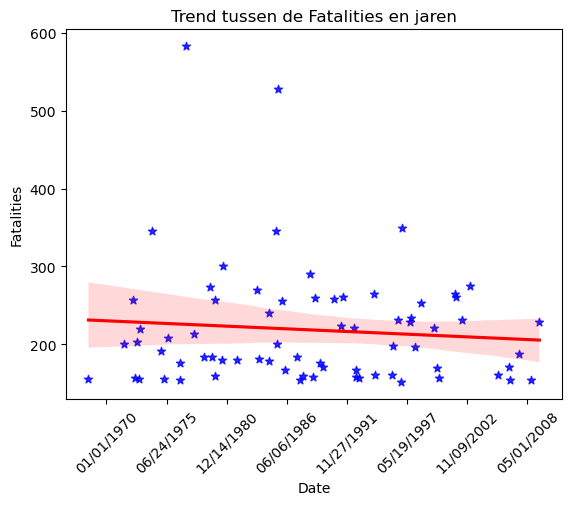

In [ ]:
#Hier nog een checkbox toevoegen, zodat het de regressielijn weergeeft met een 'Ja' of 'Nee' 
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

subset = date_fatalities[(date_fatalities['Date'] >= datetime.datetime(1950, 1, 1)) & (date_fatalities['Fatalities'] > 150)].copy()

subset.loc[:, 'Date'] = subset['Date'].apply(mdates.date2num)




ax = sb.regplot(data=subset, x='Date', y='Fatalities', fit_reg=True, dropna=True, marker='*', scatter_kws={"color": "blue"}, line_kws={"color": "red"})
date_format = mdates.DateFormatter('%m/%d/%Y')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(rotation=45)

ax.set_title("Trend tussen de Fatalities en jaren")
plt.show()

Uit de visualisatie is er te zien dat er meerdere uitschieters zijn op verschillende jaren. Ook is er te zien dat er vanaf 1970-2008 er een afname is in fatalities. We wilde een voorspellend model maken, alleen dat zou niet betrouwbaar zijn, want de vliegtuigen in de dataset zullen verouderd zijn.

## Totaal aantal slachtoffers per jaar onderzoek m.b.v. bronnen

Bronnon: https://www.agcs.allianz.com/news-and-insights/expert-risk-articles/how-aviation-safety-has-improved.html

De hoge aantallen vliegtuigongelukken en sterfgevallen in 1970 werden veroorzaakt door meerdere factoren, waaronder toegenomen luchtverkeer, weersgerelateerde problemen, menselijke fouten, apparatuurstoringen en veiligheidskwesties zoals kapingen en pogingen tot kaping.

De afname van vliegtuigongelukken en sterfgevallen vanaf de jaren 2000 was te danken aan betere vliegtuigontwerpen, veiligheidstechnologieën, opleiding en certificeringsnormen voor piloten, luchtverkeersleidingssystemen, regelgeving en toezicht door luchtvaartautoriteiten, strengere veiligheidsprocedures van luchtvaartmaatschappijen (zoals onderhoudsinspecties, pre-flight checks en bemanningsbeheerpraktijken) en vooruitgang in weersvoorspellingen en communicatietechnologie.(How aviation safety has improved, z.d.)

In [154]:
!streamlit run case_2.py